# Lending Club Case Study

##### Group Members: 
1. Akash Garg
2. Divya Moorthy

# Content

* [Assignment Brief](#Assignment-Brief)
* [Data Understanding](#Data-Understanding)
* [Data Cleaning](#Data-Cleaning)
* [Data Analysis](#Data-Analysis)
* [Conlusion](#Conlusion)
 



## Assignment Brief <a class="anchor" id="Assignment-Brief"></a>

You work for a consumer finance company **Lending Club** which specialises in lending various types of loans to urban customers. This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. When the company receives a loan application, the company has to **make a decision for loan approval based on the applicant’s profile.**
When a person applies for a loan, there are two types of decisions that could be taken by the company:

**1. Loan accepted:** If the company approves the loan, there are 3 possible scenarios described below:

**Fully paid:** Applicant has fully paid the loan (the principal and the interest rate)

**Current:** Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

**Charged-off:** Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

**2. Loan rejected:** The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

# Solution

### Basic Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


import warnings
pd.set_option('display.max_rows', None)
warnings.filterwarnings('ignore')

## Step 1: Data Understanding <a class="anchor" id="Data-Understanding"></a>

#### Reading CSV File

In [2]:
# Reading the loan dataset
loan_df = pd.read_csv('loan.csv', low_memory=False, sep=",")

#### Displaying top five Data-Points using pandas head function.

In [3]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


#### Geting the shape of the Dataframe

In [4]:
loan_df.shape

(39717, 111)

#### Displaying Information of the csv like memory used and variable type.

In [5]:
# Inspecting the dataset
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


#### Displaying Descriptive statistics of the Data

In [6]:
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


#### Checking the Datatype of each columns.

In [7]:
loan_df.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

## Step 2: Data Cleaning <a class="anchor" id="Data-Cleaning"></a>

#### Checking Number of Missing Values in each Column

In [8]:
loan_df.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


#### Checking Percentage of Missing Values in each Column

In [9]:
percentage_val = round(100*(loan_df.isnull().sum()/len(loan_df.id)), 2)
print(percentage_val)

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

#### Checking columns with more than 50% of missing values

In [10]:
percentage_val_more_than_50 = list(percentage_val[percentage_val >= 50].index)
len(percentage_val_more_than_50)

57

In [11]:
loan_df.id.unique().size

39717

### lets remove all the columns which will not impact or required for our analysis

- collections_12_mths_ex_med

- chargeoff_within_12_mths and tax_liens

- member_id

- pymnt_plan

- url

- zip_code

- initial_list_status

- policy_code

- application_type

- acc_now_delinq

- delinq_amnt

- funded_amnt

- funded_amnt_inv

In [12]:
loan_df = loan_df.drop(['id','member_id','funded_amnt','funded_amnt_inv','pymnt_plan','url','zip_code','initial_list_status','collections_12_mths_ex_med','policy_code','application_type','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens'],axis=1)

In [13]:
loan_df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,5000,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2,2400,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
3,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
4,3000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


#### Checking columns with more than 50% of missing values

In [14]:
percentage_val = round(100*(loan_df.isnull().sum()/len(loan_df.index)), 2)
percentage_val_more_than_50 = list(percentage_val[percentage_val >= 50].index)
len(percentage_val_more_than_50)

57

#### Dropping columns with more than 50% of missing values

In [15]:
loan_df = loan_df.drop(percentage_val_more_than_50,axis=1)
loan_df.shape

(39717, 39)

#### summarise number of missing values

In [16]:
round(100*(loan_df.isnull().sum()/len(loan_df.index)),2)

loan_amnt                   0.00
term                        0.00
int_rate                    0.00
installment                 0.00
grade                       0.00
sub_grade                   0.00
emp_title                   6.19
emp_length                  2.71
home_ownership              0.00
annual_inc                  0.00
verification_status         0.00
issue_d                     0.00
loan_status                 0.00
desc                       32.58
purpose                     0.00
title                       0.03
addr_state                  0.00
dti                         0.00
delinq_2yrs                 0.00
earliest_cr_line            0.00
inq_last_6mths              0.00
open_acc                    0.00
pub_rec                     0.00
revol_bal                   0.00
revol_util                  0.13
total_acc                   0.00
out_prncp                   0.00
out_prncp_inv               0.00
total_pymnt                 0.00
total_pymnt_inv             0.00
total_rec_

#### Only One Column Containing more than 30% of Null Values So lets Check the Content

In [17]:
loan_df.loc[:, ['desc']].head()

,desc
0,Borrower added on 12/22/11 > I need to upgra...
1,Borrower added on 12/22/11 > I plan to use t...
2,NaN
3,Borrower added on 12/21/11 > to pay for prop...
4,Borrower added on 12/21/11 > I plan on combi...


#### Data Containing Long sentence which is not relevant and also Memory Consuption will be more.

In [18]:
loan_df = loan_df.drop('desc',axis=1)

#### summarise number of missing values again

In [19]:
round(100*(loan_df.isnull().sum()/len(loan_df.index)),2)

loan_amnt                  0.00
term                       0.00
int_rate                   0.00
installment                0.00
grade                      0.00
sub_grade                  0.00
emp_title                  6.19
emp_length                 2.71
home_ownership             0.00
annual_inc                 0.00
verification_status        0.00
issue_d                    0.00
loan_status                0.00
purpose                    0.00
title                      0.03
addr_state                 0.00
dti                        0.00
delinq_2yrs                0.00
earliest_cr_line           0.00
inq_last_6mths             0.00
open_acc                   0.00
pub_rec                    0.00
revol_bal                  0.00
revol_util                 0.13
total_acc                  0.00
out_prncp                  0.00
out_prncp_inv              0.00
total_pymnt                0.00
total_pymnt_inv            0.00
total_rec_prncp            0.00
total_rec_int              0.00
total_re

#### Displaying Column which Have Null Values

In [20]:
round(loan_df.isnull().sum()/len(loan_df)*100, 2).loc[lambda x : x > 0]

emp_title               6.19
emp_length              2.71
title                   0.03
revol_util              0.13
last_pymnt_d            0.18
last_credit_pull_d      0.01
pub_rec_bankruptcies    1.75
dtype: float64

In [21]:
print("Count unique Values in emp_title : ",len(loan_df.emp_title.unique()))
print("Count unique Values in emp_length : ",len(loan_df.emp_length.unique()))
print("Count unique Values in title : ",len(loan_df.title.unique()))
print("Count unique Values in revol_util : " ,len(loan_df.revol_util.unique()))
print("Count unique Values in last_pymnt_d : ",len(loan_df.last_pymnt_d.unique()))
print("Count unique Values in last_credit_pull_d : ",len(loan_df.last_credit_pull_d.unique()))
print("Count unique Values in pub_rec_bankruptcies : ",len(loan_df.pub_rec_bankruptcies.unique()))

Count unique Values in emp_title :  28821
Count unique Values in emp_length :  12
Count unique Values in title :  19616
Count unique Values in revol_util :  1090
Count unique Values in last_pymnt_d :  102
Count unique Values in last_credit_pull_d :  107
Count unique Values in pub_rec_bankruptcies :  4


#### Columns emp_length and pub_rec_bankruptcies are clearly contain Categorical values.

In [22]:
# Lets take a look at these values
loan_df.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [23]:
loan_df.pub_rec_bankruptcies.unique()

array([ 0.,  1.,  2., nan])

In [24]:
loan_df.shape

(39717, 38)

#### As there is max 6% of Null values so we can drop all the null values.

In [25]:
loan_df.dropna(subset=['emp_title','emp_length','title','revol_util','last_pymnt_d','last_credit_pull_d', 'pub_rec_bankruptcies'], inplace=True)

#### Checking again the missing % of values > 0

In [26]:
round(loan_df.isnull().sum()/len(loan_df)*100, 2).loc[lambda x : x > 0]

Series([], dtype: float64)

In [27]:
loan_df.shape

(36433, 38)

In [28]:
# summarise number of missing values again
round(100*(loan_df.isnull().sum()/len(loan_df.index)),2)

loan_amnt                  0.0
term                       0.0
int_rate                   0.0
installment                0.0
grade                      0.0
sub_grade                  0.0
emp_title                  0.0
emp_length                 0.0
home_ownership             0.0
annual_inc                 0.0
verification_status        0.0
issue_d                    0.0
loan_status                0.0
purpose                    0.0
title                      0.0
addr_state                 0.0
dti                        0.0
delinq_2yrs                0.0
earliest_cr_line           0.0
inq_last_6mths             0.0
open_acc                   0.0
pub_rec                    0.0
revol_bal                  0.0
revol_util                 0.0
total_acc                  0.0
out_prncp                  0.0
out_prncp_inv              0.0
total_pymnt                0.0
total_pymnt_inv            0.0
total_rec_prncp            0.0
total_rec_int              0.0
total_rec_late_fee         0.0
recoveri

#### As of the irrelevant column is drop and there is no Null value present in the DataFrame. Now checking the Dataframe data based on Assignment problem.


In [29]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                36433 non-null  int64  
 1   term                     36433 non-null  object 
 2   int_rate                 36433 non-null  object 
 3   installment              36433 non-null  float64
 4   grade                    36433 non-null  object 
 5   sub_grade                36433 non-null  object 
 6   emp_title                36433 non-null  object 
 7   emp_length               36433 non-null  object 
 8   home_ownership           36433 non-null  object 
 9   annual_inc               36433 non-null  float64
 10  verification_status      36433 non-null  object 
 11  issue_d                  36433 non-null  object 
 12  loan_status              36433 non-null  object 
 13  purpose                  36433 non-null  object 
 14  title                 

#### There are also many columns which is irrelevant to our Problem statement like all are the feature od customer relationship and behaviour.

In [30]:
irrelevant_var =  ["delinq_2yrs","earliest_cr_line","inq_last_6mths","open_acc","out_prncp","out_prncp_inv",
                   "total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee",
                   "recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","last_credit_pull_d"]
loan_df = loan_df.drop(irrelevant_var, axis=1)

In [31]:
loan_df.shape

(36433, 22)

let's have a look at the target variable - loan_status. We need to relabel the values to a binary form - 0 or 1, 1 indicating that the person has defaulted and 0 otherwise.

In [32]:
loan_df['loan_status'] = loan_df['loan_status'].astype('category')
loan_df['loan_status'].value_counts()

Fully Paid     30424
Charged Off     4943
Current         1066
Name: loan_status, dtype: int64

In [33]:
# filtering only fully paid or charged-off
loan_df = loan_df[loan_df['loan_status'] != 'Current']
loan_df['loan_status'] = loan_df['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

# converting loan_status to integer type
loan_df['loan_status'] = loan_df['loan_status'].apply(lambda x: pd.to_numeric(x))

# summarising the values
loan_df['loan_status'].value_counts()

0    30424
1     4943
Name: loan_status, dtype: int64

##### cleaning column 'int_rate' and  'emp_length'

In [34]:
loan_df['int_rate'] = loan_df.int_rate.str.replace('%','').astype(float)
loan_df['emp_length'] = loan_df.emp_length.str.replace('years','').str.replace('year','').str.replace('+','').str.replace('< 1','0.5').astype(float)

#### Now Data is clean and can be use as further Analysis

In [35]:
loan_df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,loan_status,purpose,title,addr_state,dti,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
1,2500,60 months,15.27,59.83,C,C4,Ryder,0.5,RENT,30000.0,...,1,car,bike,GA,1.00,0,1687,9.40%,4,0.0
3,10000,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10.0,RENT,49200.0,...,0,other,personel,CA,20.00,0,5598,21%,37,0.0
5,5000,36 months,7.90,156.46,A,A4,Veolia Transportaton,3.0,RENT,36000.0,...,0,wedding,My wedding loan I promise to pay back,AZ,11.20,0,7963,28.30%,12,0.0
6,7000,60 months,15.96,170.08,C,C5,Southern Star Photography,8.0,RENT,47004.0,...,0,debt_consolidation,Loan,NC,23.51,0,17726,85.60%,11,0.0
7,3000,36 months,18.64,109.43,E,E1,MKC Accounting,9.0,RENT,48000.0,...,0,car,Car Downpayment,CA,5.35,0,8221,87.50%,4,0.0


## Step 3: Data Analysis <a class="anchor" id="Data-Analysis"></a>

#### Displaying All the remaining Columns after Data Cleaning

In [36]:
loan_df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'addr_state', 'dti', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

### Univariate Analysis

Mean Value of Target Variable 'loan_status' is :  0.14


<AxesSubplot:>

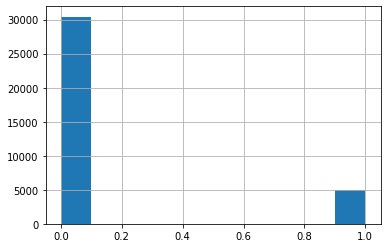

In [37]:
# Lets check the overall default rate
print("Mean Value of Target Variable 'loan_status' is : ",round(loan_df['loan_status'].mean(), 2))
loan_df['loan_status'].hist()

#### So 14% of values are Default.

#### Define a function for Ploting barplot wrt to target variable

In [38]:
def plot_wrt_loan_status(variable):
    sns.barplot(x=variable, y='loan_status', data=loan_df)
    plt.show()

### Observation 1: 
#### As per below Observation we are able to find that From Grade A to G default rate is increasing.

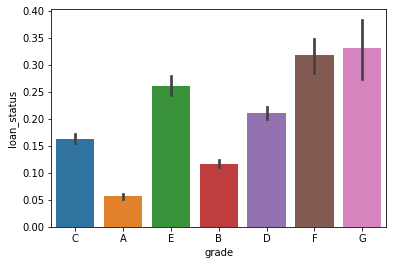

In [39]:
plot_wrt_loan_status('grade')

### Observation 2: 
#### 60 months tenure have more default rate then 36 months tenure in total % 

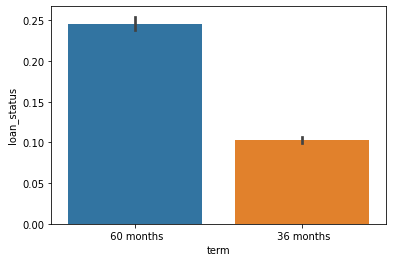

In [40]:
plot_wrt_loan_status('term')

### Observation 3:
#### sub-grade is also increase in order- A1 is better than A2 better than A3 and so on

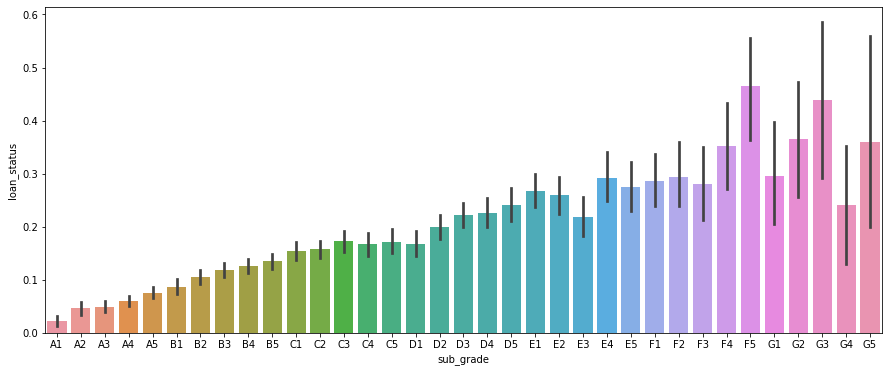

In [41]:
plt.figure(figsize=(15, 6))
loan_df = loan_df.sort_values('sub_grade',ascending=True)
plot_wrt_loan_status('sub_grade')

### Observation 4:
#### verification_status :not verified has low default rate

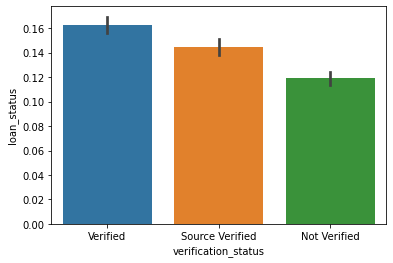

In [42]:
plot_wrt_loan_status('verification_status')

### Observation 5: 
#### home ownership: Mortgage, Rent, Own almost have same rate while Other is sighly up so no descriminator.

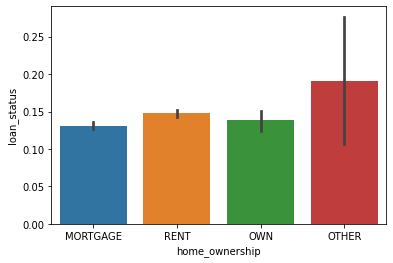

In [43]:
plot_wrt_loan_status('home_ownership')

### Observation 6: 
#### purpose: small business loans default the most, then others value.

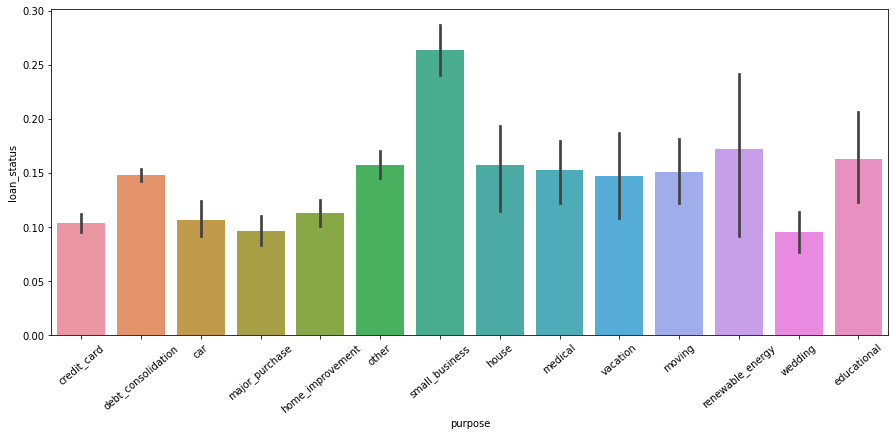

In [44]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=40) 
plot_wrt_loan_status('purpose')

#### Finding loan distribution over years and month but due to noise value not able to use default pd.to_datetime function

In [45]:
loan_df['issue_d'] = loan_df['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [46]:
# extracting month and year from issue_date
loan_df['month'] = loan_df['issue_d'].apply(lambda x: x.month)
loan_df['year'] = loan_df['issue_d'].apply(lambda x: x.year)

In [47]:
# let's first observe the number of loans granted across years
loan_df.groupby('year').year.count()

year
2007        6
2008     1053
2009     4423
2010    10795
2011    19090
Name: year, dtype: int64

### Observation 7: 
#### Year 2007 has more deafult rate rest having almost same

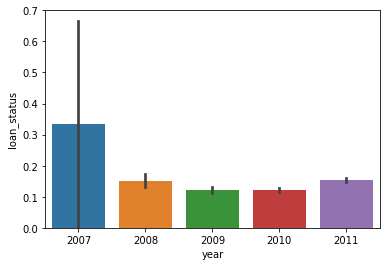

In [48]:
plot_wrt_loan_status('year')

In [49]:
# number of loans across months
loan_df.groupby('month').month.count()

month
1     2048
2     2020
3     2395
4     2669
5     2745
6     2977
7     3115
8     3188
9     3276
10    3436
11    3678
12    3820
Name: month, dtype: int64

#### comparing default rates across months: not much variation across months

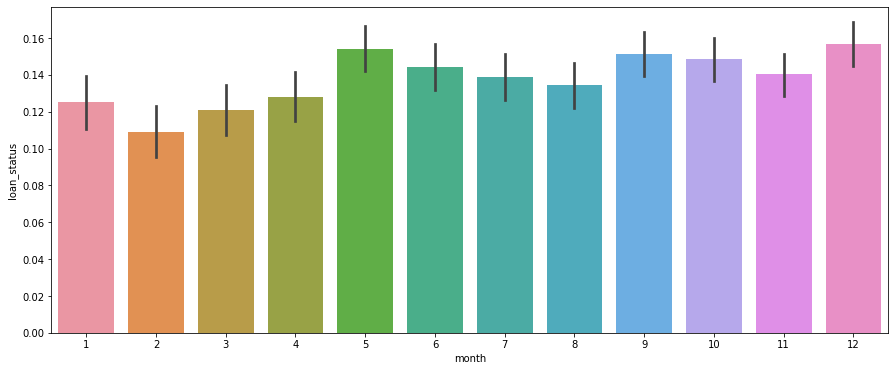

In [50]:
plt.figure(figsize=(15, 6))
plot_wrt_loan_status('month')

### Observation 8: 
#### addr_state: State TN has maximun loan default rate then others.

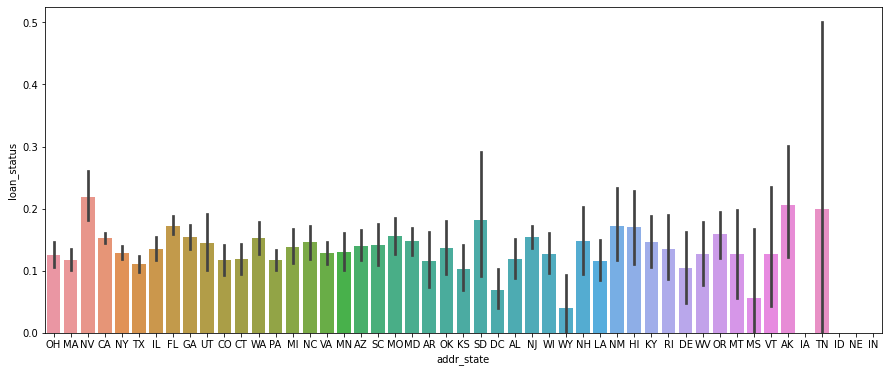

In [51]:
plt.figure(figsize=(15, 6))
plot_wrt_loan_status('addr_state')

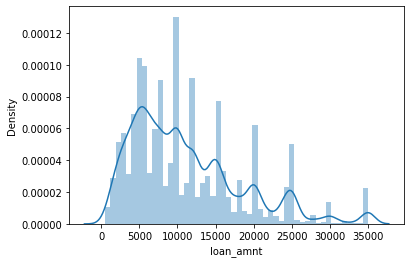

In [52]:
# loan amount: the median loan amount is around 10,000
sns.distplot(loan_df['loan_amnt'])
plt.show()

The easiest way to analyse how default rates vary across continous variables is to bin the variables into discrete categories.

Let's bin the loan amount variable into small, medium, high, very high.

In [53]:
# binning loan amount
def loan_amount(n):
    if n < 5000:
        return 'low'
    elif n >=5000 and n < 15000:
        return 'medium'
    elif n >= 15000 and n < 25000:
        return 'high'
    else:
        return 'very high'
        
loan_df['loan_amnt_new'] = loan_df['loan_amnt'].apply(lambda x: loan_amount(x))

In [54]:
loan_df['loan_amnt_new'].value_counts()

medium       19068
high          7147
low           6611
very high     2541
Name: loan_amnt_new, dtype: int64

### Observation 9: 
#### compare the default rates across loan amount type: higher the loan amount, higher the default rate and lot of noise in non-default case in boxplot

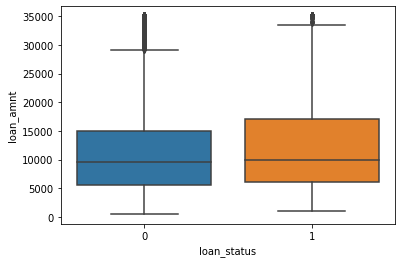

In [55]:
sns.boxplot(x=loan_df['loan_status'],y=loan_df['loan_amnt']);

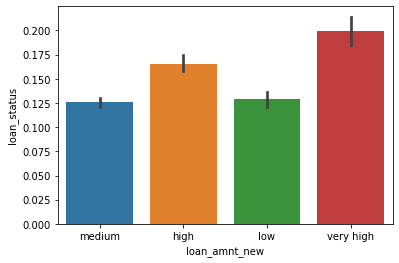

In [56]:
plot_wrt_loan_status('loan_amnt_new')

In [57]:
# lets also convert interest rate to low, medium, high
# binning loan amount
def int_rate(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=15:
        return 'medium'
    else:
        return 'high'
    
    
loan_df['int_rate_new'] = loan_df['int_rate'].apply(lambda x: int_rate(x))

### Observation 10: 
#### comparing default rates across rates of interest : high interest rates default more, as expected.

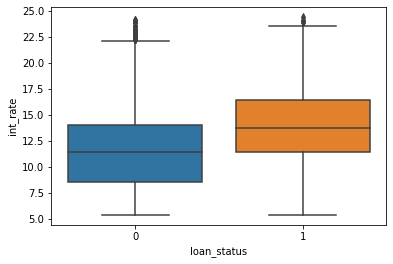

In [58]:
sns.boxplot(x=loan_df['loan_status'],y=loan_df['int_rate']);

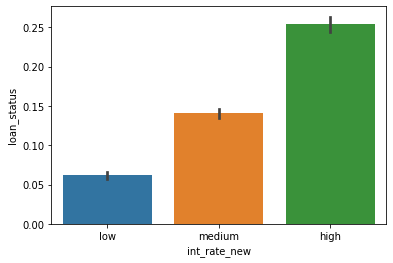

In [59]:
plot_wrt_loan_status('int_rate_new')

In [60]:
# debt to income ratio
def dti(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=20:
        return 'medium'
    else:
        return 'high'
    

loan_df['dti_new'] = loan_df['dti'].apply(lambda x: dti(x))

### Observation 11: 
#### comparing default rates across debt to income ratio : high dti translates into higher default rates, as expected.

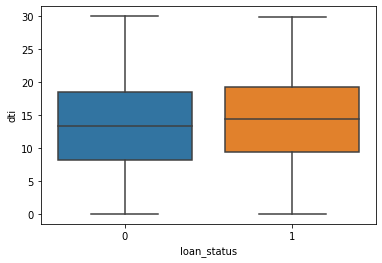

In [61]:
sns.boxplot(x=loan_df['loan_status'],y=loan_df['dti']);

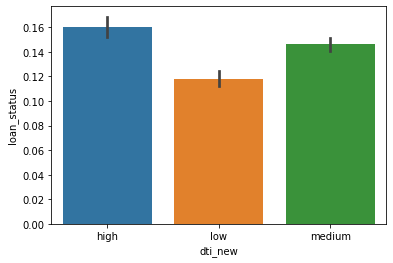

In [62]:
plot_wrt_loan_status('dti_new')

In [63]:
# installment
def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=400:
        return 'medium'
    elif n > 400 and n <=600:
        return 'high'
    else:
        return 'very high'
    
loan_df['installment_new'] = loan_df['installment'].apply(lambda x: installment(x))

### Observation 12: 
#### comparing default rates across installment : the higher the installment amount, the higher the default rate.

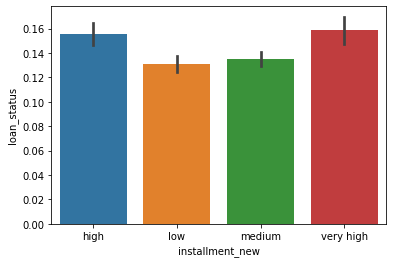

In [64]:
plot_wrt_loan_status('installment_new')

In [65]:
# annual income
def annual_income(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'

loan_df['annual_inc_new'] = loan_df['annual_inc'].apply(lambda x: annual_income(x))

### Observation 13: 
#### annual income and default rate : lower the annual income, higher the default rate.

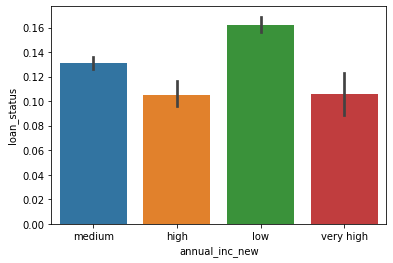

In [66]:
plot_wrt_loan_status('annual_inc_new')

In [67]:
loan_df=loan_df.drop(['annual_inc_new','installment_new','dti_new','loan_amnt_new','int_rate_new'],axis=1)

### Bivariate Analysis

In the credit industry, one of the most important factors affecting default is the purpose of the loan - home loans perform differently than credit cards, credit cards are very different from debt condolidation loans etc.

Let's again have a look at the default rates across the purpose of the loan.

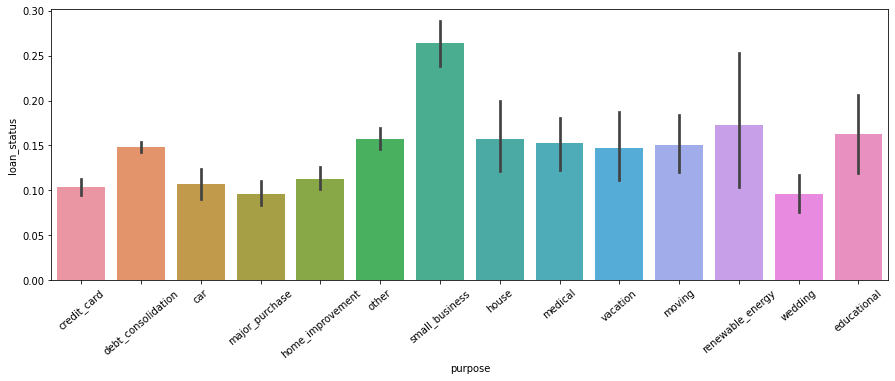

In [68]:
plt.figure(figsize=(15, 5))
plt.xticks(rotation=40)
plot_wrt_loan_status('purpose')

In the upcoming analyses, we will segment the loan applications across the purpose of the loan, since that is a variable affecting many other variables - the type of applicant, interest rate, income, and finally the default rate.

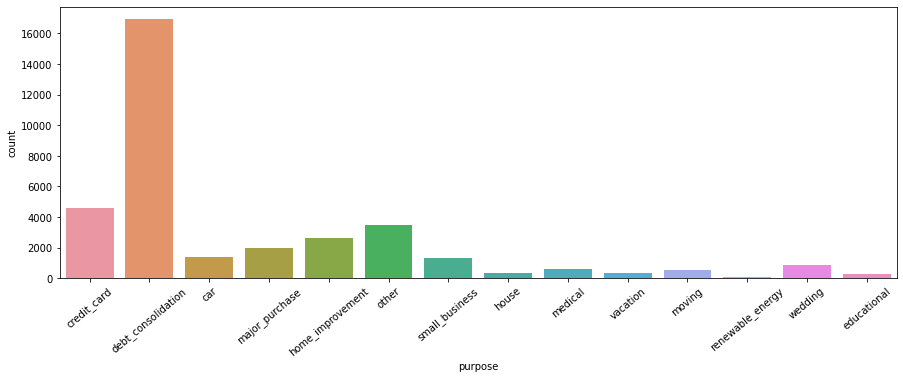

In [69]:
# lets first look at the number of loans for each type (purpose) of the loan
# most loans are debt consolidation (to repay otehr debts), then credit card, major purchase etc.
plt.figure(figsize=(15, 5))
plt.xticks(rotation=40)
sns.countplot(x='purpose', data=loan_df)
plt.show()

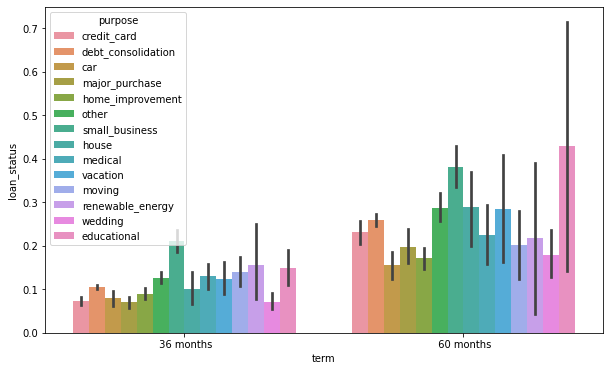

In [70]:
plt.figure(figsize=[10, 6])
sns.barplot(x='term', y="loan_status", hue='purpose', data=loan_df)
plt.show()

### Observation 14: 
#### Purpose : There are top 4: consolidation, credit card, home improvement and major purchase.

Let's analyse the top 4 types of loans based on purpose: consolidation, credit card, home improvement and major purchase.

In [71]:
# filtering the df for the 4 types of loans mentioned above
main_purposes = ["credit_card","debt_consolidation","home_improvement","major_purchase"]
loan_all_status = loan_df[loan_df['purpose'].isin(main_purposes)]
loan_all_status['purpose'].value_counts()

debt_consolidation    16911
credit_card            4626
home_improvement       2614
major_purchase         1973
Name: purpose, dtype: int64

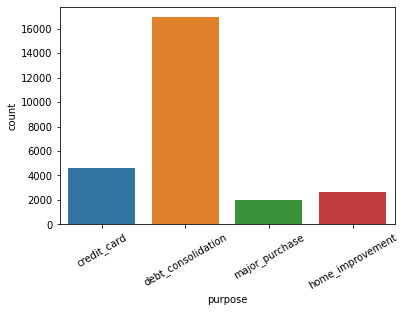

In [72]:
# plotting number of loans by purpose 
sns.countplot(x=loan_all_status['purpose'])
plt.xticks(rotation=30)
plt.show()

#### lets write a function which takes a categorical variable and plots the default rate


In [73]:
def plot_seg_target(variable):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=variable, y='loan_status', hue='purpose', data=loan_all_status)
    plt.show()

### Observation 15: 
#### compare the default rates across two types of categorical variables :purpose of loan (constant) and another categorical variable (which changes)

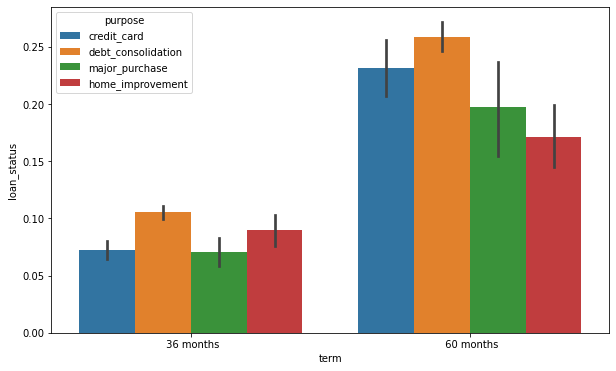

In [74]:
plot_seg_target('term')

### Observation 16: 
#### compare the default rates with grade and top 4 loan purpose: valuse is increase from grade A to G

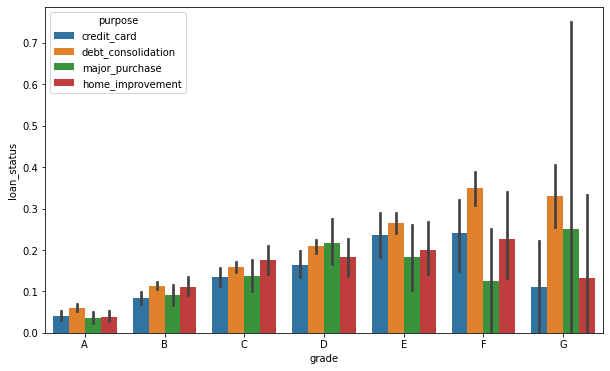

In [75]:
# grade of loan
plot_seg_target('grade')

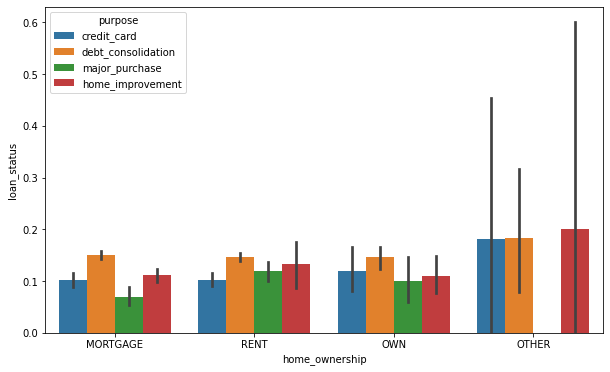

In [76]:
# home ownership
plot_seg_target('home_ownership')

### Observation 17: 
#### compare the default rates with year and top 4 loan purpose: year 2007 only contain debt_consolidation and having max default rate

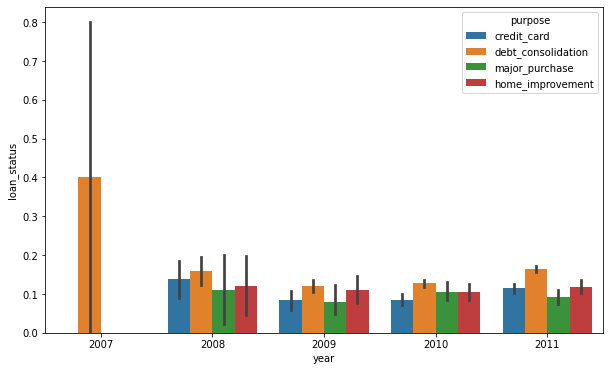

In [77]:
# year
plot_seg_target('year')

In [78]:
# binning the emp_length variable
def emp_length(n):
    if n <= 1:
        return 'fresher'
    elif n > 1 and n <=3:
        return 'junior'
    elif n > 3 and n <=7:
        return 'senior'
    else:
        return 'expert'

loan_all_status['emp_length'] = loan_all_status['emp_length'].apply(lambda x: emp_length(x))

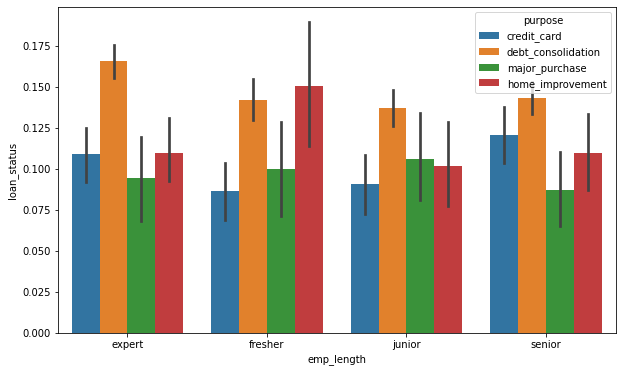

In [79]:
# emp_length
plot_seg_target('emp_length')

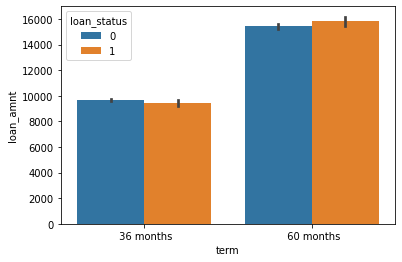

In [80]:
sns.barplot(x='term', y='loan_amnt', hue="loan_status", data=loan_df, estimator=np.mean)
plt.show()

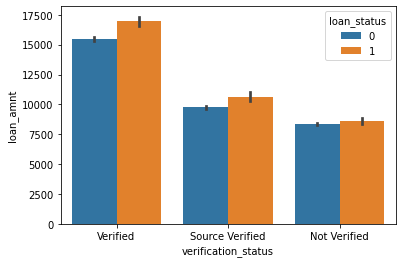

In [81]:
sns.barplot(x='verification_status', y='loan_amnt', hue="loan_status", data=loan_df, estimator=np.mean)
plt.show()

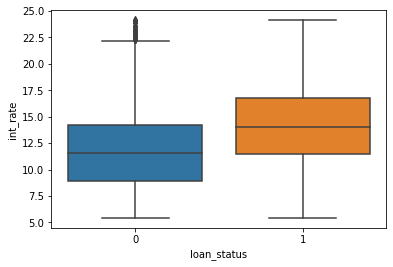

In [82]:
sns.boxplot(y='int_rate',x='loan_status',data=loan_all_status)
plt.show()

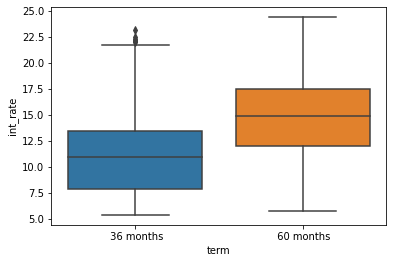

In [83]:
sns.boxplot(y ='int_rate', x ='term',data=loan_df)
plt.show()

### Observation 18: 
#### compare the loan_amt with grade: distriibution is increasing from grade A to G with and decrease in outliers from A to G, A has max Outliers

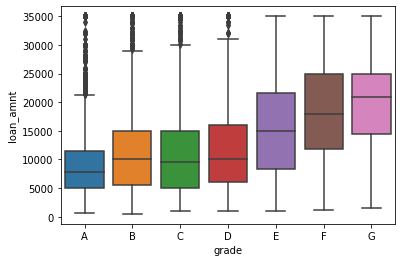

In [84]:
sns.boxplot(y ='loan_amnt', x ='grade',data=loan_df)
plt.show()

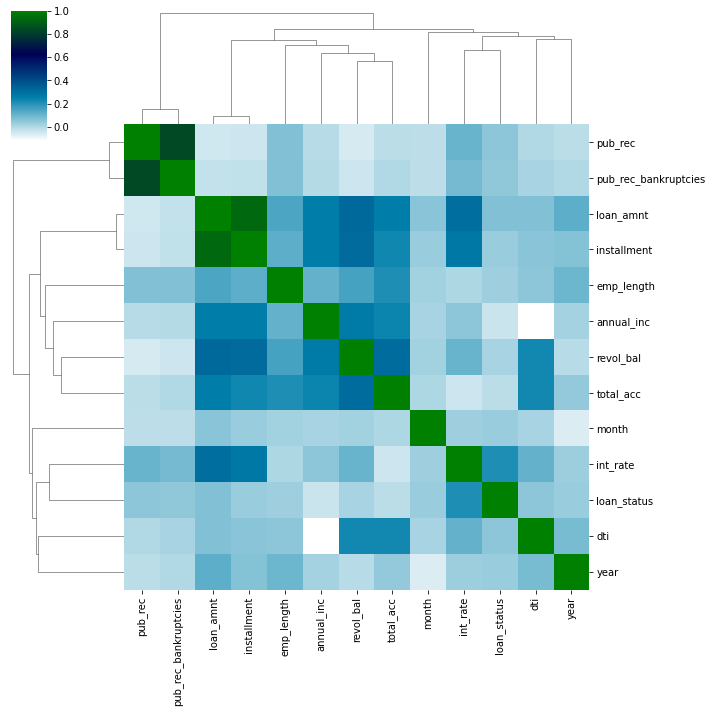

In [85]:
sns.clustermap(data=loan_df.corr(),cmap='ocean_r')
plt.show()

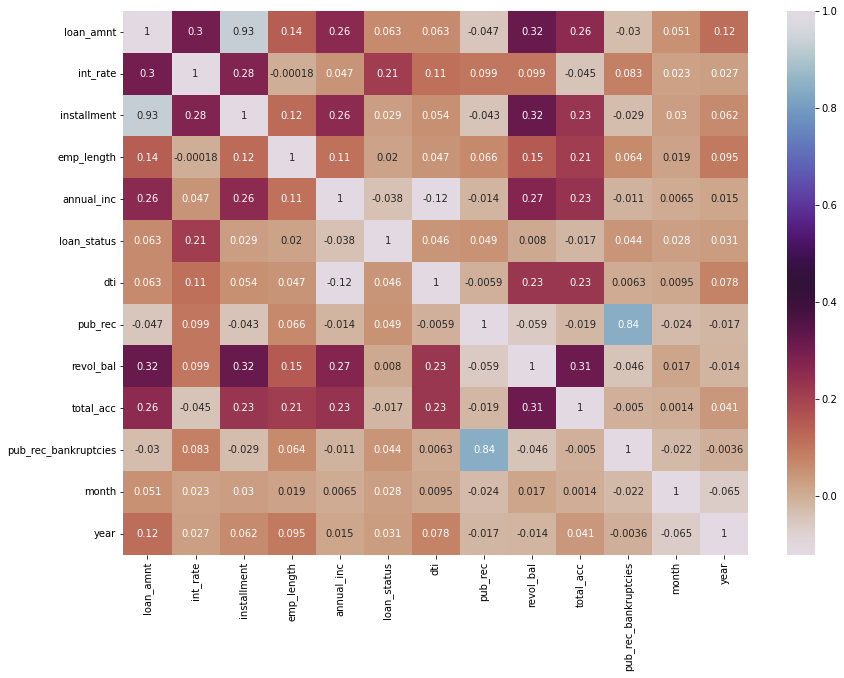

In [86]:
corelation_plot = loan_df.corr()
plt.figure(figsize=(14,10))
ax = sns.heatmap(corelation_plot,annot=True,cmap='twilight_r')
plt.show()

In [87]:
loan_df_inc = loan_all_status[loan_all_status['annual_inc']<250000][['annual_inc','loan_amnt','loan_status']]

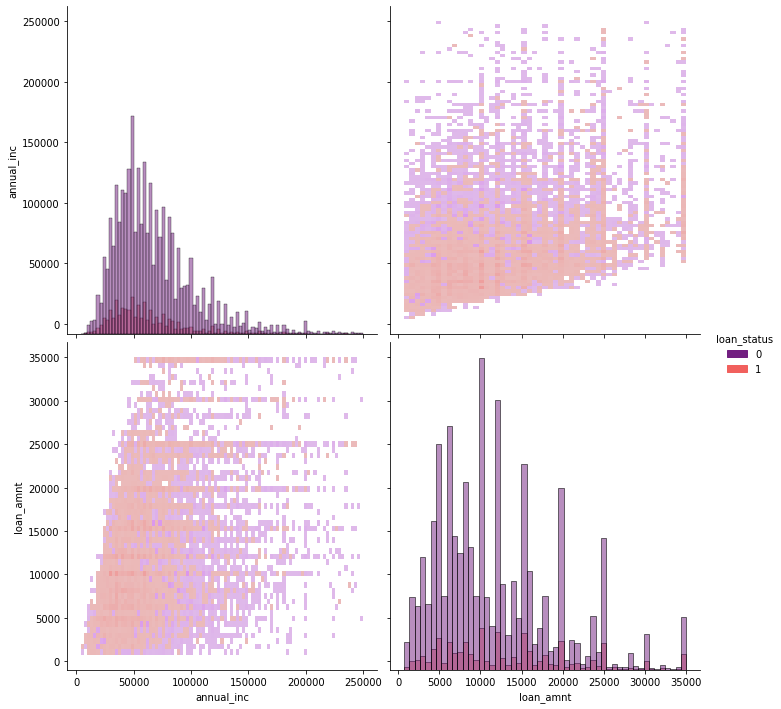

In [88]:
sns.pairplot(loan_df_inc,hue='loan_status',palette = 'magma',kind = 'hist',size = 5)
plt.show()

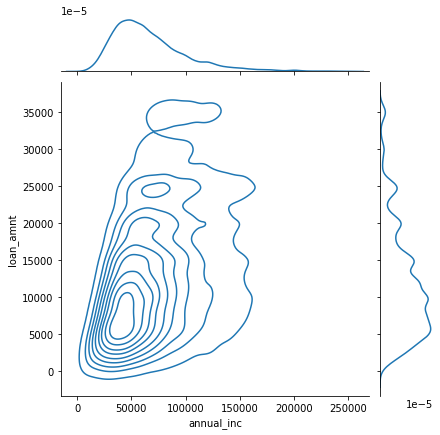

In [89]:
sns.jointplot(data=loan_df_inc,x='annual_inc',y='loan_amnt',kind='kde')
plt.show()

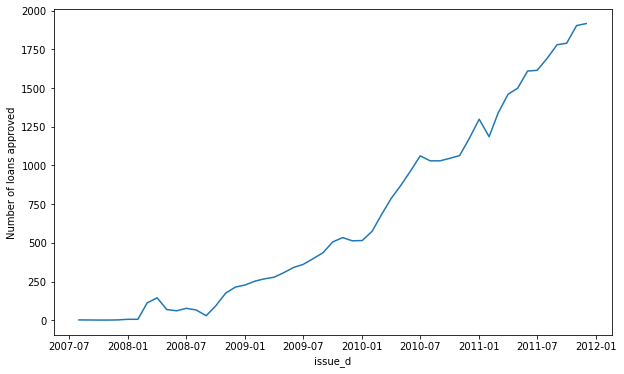

In [90]:
# Number of approved loans over the years
loan_df_new=loan_df.groupby('issue_d').count().reset_index().loc[:,['issue_d','loan_amnt']]
fig = plt.figure(figsize=(10, 6))
sns.lineplot(x='issue_d', y='loan_amnt', data=loan_df_new)
plt.ylabel('Number of loans approved')
plt.show()

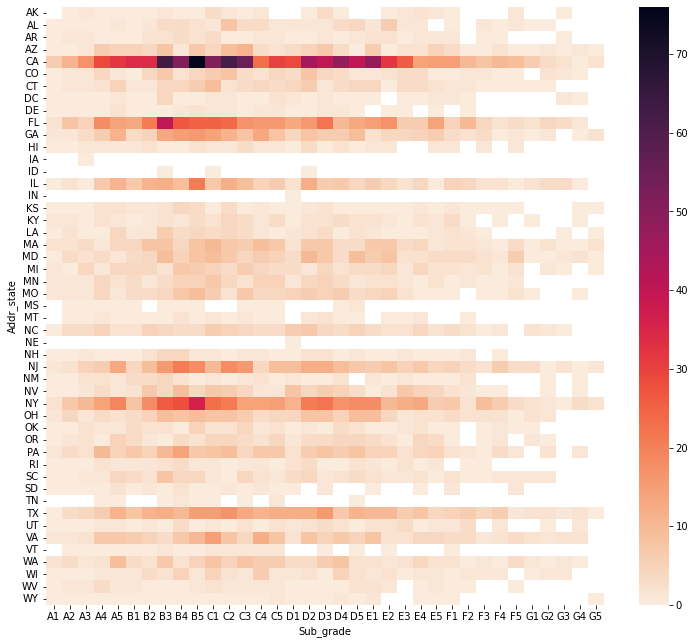

In [92]:
loan_df_new_2=loan_df.loc[:,['loan_status','addr_state','sub_grade']]
# Initializing an empty dataframe and imputing columns using groupby on state and sub grade
loan_df_exp = pd.DataFrame()
loan_df_exp['State_sub'] = list(loan_df_new_2.groupby(['addr_state','sub_grade'])['loan_status'].agg(lambda x: sum(list(x))).index.values)
loan_df_exp['Count'] = list(loan_df_new_2.groupby(['addr_state','sub_grade'])['loan_status'].agg(lambda x: sum(list(x))).values)
loan_df_exp['Addr_state'] = loan_df_exp['State_sub'].apply(lambda v: v[0])
loan_df_exp['Sub_grade'] = loan_df_exp['State_sub'].apply(lambda v: v[1])
loan_pvt = loan_df_exp.pivot("Addr_state", "Sub_grade", "Count")

cmap = sns.cm.rocket_r

# Ploting the heatmap
fig = plt.figure(figsize=(12.5, 11))
sns.heatmap(loan_pvt,cmap = cmap)
plt.show()

In [95]:
loan_df.describe(include='all')

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,title,addr_state,dti,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,month,year
count,35367.000000,35367,35367.000000,35367.000000,35367,35367,35367,35367.000000,35367,3.536700e+04,...,35367,35367,35367.000000,35367.000000,35367.000000,35367,35367.000000,35367.000000,35367.000000,35367.000000
unique,NaN,2,NaN,NaN,7,35,27414,NaN,4,NaN,...,17662,49,NaN,NaN,NaN,1081,NaN,NaN,NaN,NaN
top,NaN,36 months,NaN,NaN,B,A4,US Army,NaN,RENT,NaN,...,Debt Consolidation,CA,NaN,NaN,NaN,0%,NaN,NaN,NaN,NaN
freq,NaN,26377,NaN,NaN,10718,2662,128,NaN,17065,NaN,...,1975,6396,NaN,NaN,NaN,832,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,11133.071790,NaN,11.983468,324.043982,NaN,NaN,NaN,5.039783,NaN,6.909599e+04,...,NaN,NaN,13.403961,0.054147,13367.676733,NaN,22.209206,0.041677,7.153194,2010.354653
std,7326.233093,NaN,3.702512,207.149088,NaN,NaN,NaN,3.460486,NaN,6.396705e+04,...,NaN,NaN,6.636540,0.235734,15678.460397,NaN,11.403045,0.200560,3.368371,0.812213
min,500.000000,NaN,5.420000,16.080000,NaN,NaN,NaN,0.500000,NaN,4.000000e+03,...,NaN,NaN,0.000000,0.000000,0.000000,NaN,2.000000,0.000000,1.000000,2007.000000
25%,5500.000000,NaN,8.940000,167.840000,NaN,NaN,NaN,2.000000,NaN,4.150000e+04,...,NaN,NaN,8.320000,0.000000,3782.000000,NaN,14.000000,0.000000,4.000000,2010.000000


## Conlusion <a class="anchor" id="Conlusion"></a>

#### The following columns are important driving factors, 'sub_grade’, 'pub_rec_bankruptcies', 'addr_state', 'grade’ and  'int_rate’,'revol_util','revol_bal'. Since grade and subgrade are dependent variables we can add the ‘term’ column also as a driving factor for defaulting


#### As per the heatmap we can conclude location of the borrower has an important role in identifying the defaulting behaviours, but there are several other column variables which have quite and influence on the defaulters behaviour.

##### The loan_amnt and its correlation with the few variables
- int_rate has 0.3 with loan_amnt
- annual_inc has 0.26 with loan_amnt
- revol_bal has 0.32 with loan_amnt
- total_acc has 0.26 with loan_amnt


- The loan amount given to the customers without considering the annual_income(where few loan applicants have taken the loan amount 50% more than there annual income).This scenario has to be taken care.

- There is a positive correlation of loan status with the term and interest rate (as compared to other variables) and the same was also observed during univariate analysis